In [47]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
import seaborn as sns

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns', 11)

In [48]:
cars_data = pd.read_csv('/Users/dmitry/AI_1/carsclean.csv')
cars_data.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [49]:
print(f'Total shape {cars_data.shape}')
print(f'All columns: {", ".join(cars_data.columns.values)}')

Total shape (560, 11)
All columns: city, car_maker, model, year, condition, kilometers, transmission, fuel, color, pay_method, price


In [50]:
cars_data.describe(include = "all")

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
count,560,560,560,560.000000,560,560.000000,560,560,560,560,560.000000
unique,1,11,25,NaN,2,NaN,2,1,7,3,NaN
top,Al Riyadh,Toyota,740,NaN,Used,NaN,Automatic,Gasoline,White,Cash Only,NaN
freq,560,140,40,NaN,540,NaN,500,560,220,460,NaN
mean,NaN,NaN,NaN,2011.857143,NaN,120535.482143,NaN,NaN,NaN,NaN,37521.064286
std,NaN,NaN,NaN,3.892236,NaN,81305.837563,NaN,NaN,NaN,NaN,27022.610673
min,NaN,NaN,NaN,2006.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2114.000000
25%,NaN,NaN,NaN,2008.000000,NaN,39999.500000,NaN,NaN,NaN,NaN,19000.000000
50%,NaN,NaN,NaN,2012.500000,NaN,149999.500000,NaN,NaN,NaN,NaN,27500.000000
75%,NaN,NaN,NaN,2014.250000,NaN,200000.000000,NaN,NaN,NaN,NaN,58375.000000


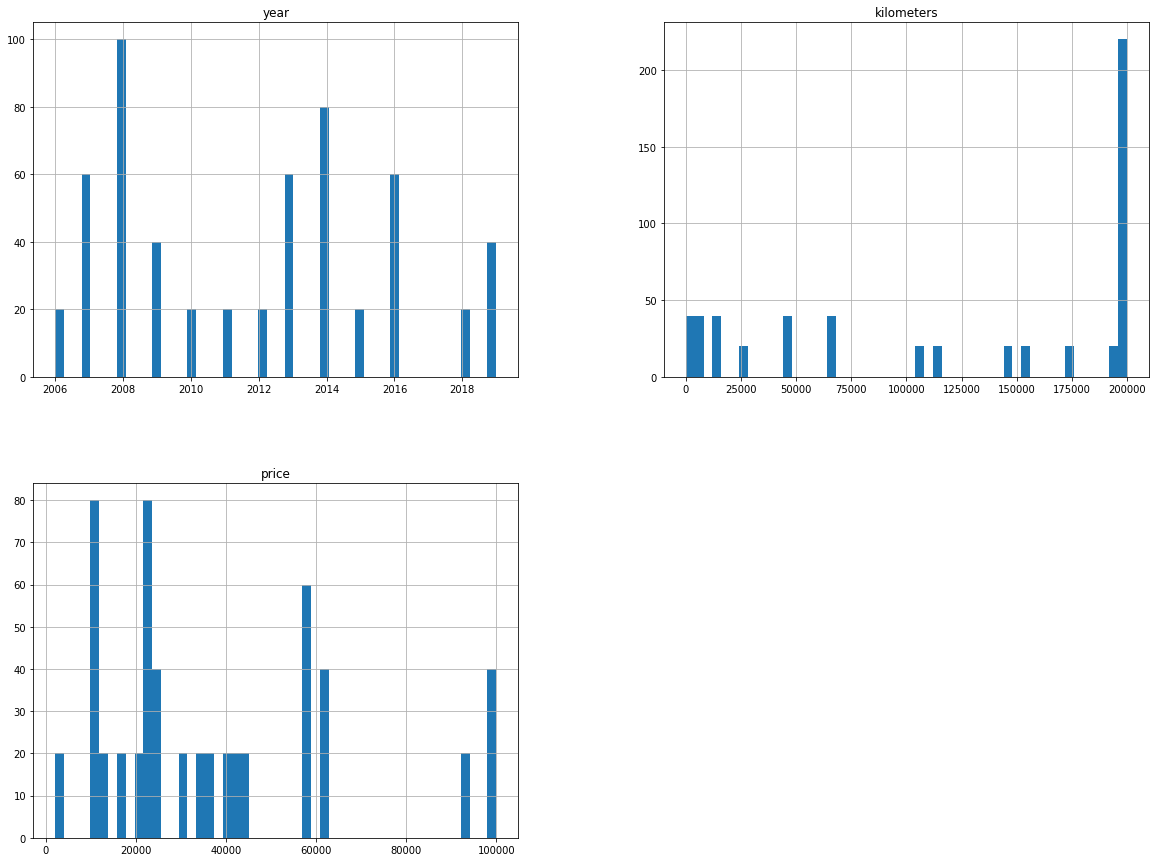

In [51]:
cars_data.hist(bins = 50, figsize = (20, 15))
plt.savefig('./cars.png')
plt.show()

In [52]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          560 non-null    object 
 1   car_maker     560 non-null    object 
 2   model         560 non-null    object 
 3   year          560 non-null    int64  
 4   condition     560 non-null    object 
 5   kilometers    560 non-null    float64
 6   transmission  560 non-null    object 
 7   fuel          560 non-null    object 
 8   color         560 non-null    object 
 9   pay_method    560 non-null    object 
 10  price         560 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


In [64]:
target = 'price'
categorial = ['city', 'car_maker', 'model', 'condition', 'transmission', 'fuel', 'color', 'pay_method']
numerical = ['year', 'kilometers', 'price']

print(f'Target column: {target}')
print(f'Categorial columns: {", ".join(categorial)}')
print(f'Numerical columns: {", ".join(numerical)}')

Target column: price
Categorial columns: city, car_maker, model, condition, transmission, fuel, color, pay_method
Numerical columns: year, kilometers, price


In [66]:
for item in categorial:
    print(len(cars_data[item].unique()), end =', ')

1, 11, 25, 2, 2, 1, 7, 3, 

In [68]:
label_encoder = LabelEncoder()
print(categorial)
for each in categorial:
    cars_cat = cars_data[each]
    cars_cat_encoded = label_encoder.fit_transform(cars_cat)
    cars_data[each] = cars_cat_encoded

['city', 'car_maker', 'model', 'condition', 'transmission', 'fuel', 'color', 'pay_method']


In [70]:
cars_data.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,0,10,20,2019,1,14999.5,0,0,6,1,58375.0
1,0,5,5,2006,1,0.0,0,0,4,0,10000.0
2,0,10,4,2014,1,24999.5,0,0,6,2,58375.0
3,0,3,14,2010,1,200000.0,0,0,6,0,22425.4
4,0,3,22,2018,1,5000.0,0,0,4,0,22425.4


In [71]:
corr_matrix = cars_data.corr()
corr_matrix[target].sort_values(ascending=False)

price           1.000000
year            0.255938
pay_method      0.127056
color           0.085101
car_maker       0.063313
kilometers     -0.077572
transmission   -0.139270
model          -0.348461
condition      -0.434669
city                 NaN
fuel                 NaN
Name: price, dtype: float64

In [72]:
cars_data.describe(include="all")

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
count,560.0,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.0,560.000000,560.000000,560.000000
mean,0.0,5.285714,11.428571,2011.857143,0.964286,120535.482143,0.107143,0.0,4.107143,0.250000,37521.064286
std,0.0,3.597426,7.224628,3.892236,0.185743,81305.837563,0.309571,0.0,2.025584,0.575281,27022.610673
min,0.0,0.000000,0.000000,2006.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2114.000000
25%,0.0,3.000000,4.750000,2008.000000,1.000000,39999.500000,0.000000,0.0,2.750000,0.000000,19000.000000
50%,0.0,5.000000,11.500000,2012.500000,1.000000,149999.500000,0.000000,0.0,5.000000,0.000000,27500.000000
75%,0.0,9.250000,17.250000,2014.250000,1.000000,200000.000000,0.000000,0.0,6.000000,0.000000,58375.000000
max,0.0,10.000000,24.000000,2019.000000,1.000000,200000.000000,1.000000,0.0,6.000000,2.000000,100000.000000


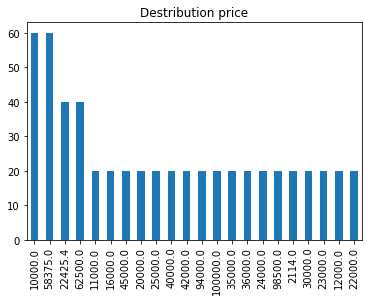

In [82]:
fig, ax = plt.subplots(1,1)
predict_column = 'price'
ax.set_title(f'Destribution {predict_column}')
cars_data['price'].value_counts().plot.bar(ax = ax)
fig.savefig('./cars_kde.png')
plt.show()

In [95]:
from sklearn.manifold import TSNE
cars_data_tsne = TSNE().fit_transform(cars_data.drop(labels = predict_column,axis = 1))

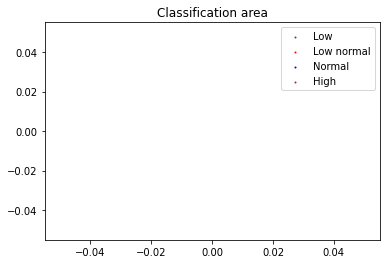

In [91]:
plt.scatter(cars_data_tsne[cars_data[predict_column]==0, 0], cars_data_tsne[cars_data[predict_column]==0, 1], c='green', label='Low',s=1)
plt.scatter(cars_data_tsne[cars_data[predict_column]==1, 0], cars_data_tsne[cars_data[predict_column]==1, 1], c = 'red', label = 'Low normal',s = 1)
plt.scatter(cars_data_tsne[cars_data[predict_column]==2, 0], cars_data_tsne[cars_data[predict_column]==2, 1], c = 'blue', label = 'Normal',s = 1)
plt.scatter(cars_data_tsne[cars_data[predict_column]==3, 0], cars_data_tsne[cars_data[predict_column]==22, 1], c = 'brown', label = 'High',s = 1)
plt.title('Classification area')
plt.legend()
plt.savefig('./cars_tsne.png')
plt.show()